# Classify the films using Logistic Regression

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# Load the dataset
df = pd.read_csv("data/movies_2015_2023_preprocessed_genre.csv")
df.head()

,title,release_year,language,genre,overview,vote_average,vote_count,popularity,cleaned_overview
0,Pad Man,2018,Indisch,Humor,upon realizing extent woman affected menses se...,7.420,200.0,7.036,upon realizing extent woman affected menses se...
1,Tamasha,2015,Indisch,Humor,meeting vacation ved tara sense connection vow...,6.720,141.0,8.770,meeting vacation ved tara sense connection vow...
2,Tu Jhoothi Main Makkaar,2023,Indisch,Humor,earn extra cash mickey help couple break life ...,6.253,144.0,10.045,earn extra cash mickey help couple break life ...
3,Hindi Medium,2017,Indisch,Humor,mita raj batra affluent couple delhi chandni c...,7.300,166.0,7.001,mita raj batra affluent couple delhi chandni c...
4,Dilwale,2015,Indisch,Humor,raj mafia member one day meet girl meera chasi...,6.648,301.0,11.501,raj mafia member one day meet girl meera chasi...


In [3]:
# Remove lines that contain NAN-Values
df_cleaned = df.dropna()

# Check whether there are still missing values
print(df_cleaned.isnull().sum())


title               0
release_year        0
language            0
genre               0
overview            0
vote_average        0
vote_count          0
popularity          0
cleaned_overview    0
dtype: int64


Define features and goals

In [4]:
# Define the features (cleaned_overview, genre, title) and the goal (language)
X = df_cleaned['cleaned_overview'] + ' ' + df_cleaned['genre']
y = df_cleaned['language']


In [5]:
# Divide the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Engineering: CountVectorizer

In [6]:
# Initialize the CountVectorizer for Bag-of-Words
vectorizer = CountVectorizer(max_features=5000)

# Convert the text into numerical features (Bag-of-Words)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [7]:
# Define the model and the parameters for the Grid Search
log_reg = LogisticRegression(max_iter=5000)

param_grid_reduced = {
    'C': [1, 10, 100],  
    'solver': ['liblinear'],
    'penalty': ['l2','l1'],  
}

# Apply grid search
grid_search_reduced = GridSearchCV(log_reg, param_grid_reduced, cv=5, verbose=1)
grid_search_reduced.fit(X_train_vec, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [1, 10, 100], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear']},
             verbose=1)

In [8]:
# Predictions on the test set
y_pred = grid_search_reduced.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6883870967741935


In [9]:
# Generate a classification report
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


              precision    recall  f1-score   support

Amerikanisch       0.73      0.83      0.78       911
     Deutsch       0.65      0.55      0.60       364
 Französisch       0.74      0.60      0.66       531
     Indisch       0.73      0.75      0.74       366
 Italienisch       0.66      0.49      0.56       307
    Spanisch       0.60      0.70      0.64       621

    accuracy                           0.69      3100
   macro avg       0.69      0.65      0.66      3100
weighted avg       0.69      0.69      0.68      3100



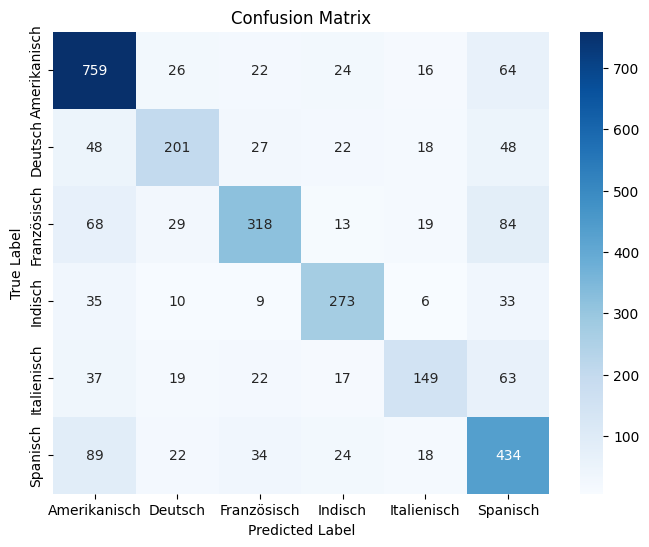

In [10]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=grid_search_reduced.classes_, 
            yticklabels=grid_search_reduced.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


TF-IDF (Term Frequency-Inverse Document Frequency)

In [11]:
# Divide the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [13]:
# Define the model and the parameters for the Grid Search
log_reg = LogisticRegression(max_iter=5000)

param_grid_reduced = {
    'C': [1, 10, 100],  
    'solver': ['liblinear'],
    'penalty': ['l2','l1'],  
}

# Apply grid search
grid_search_reduced = GridSearchCV(log_reg, param_grid_reduced, cv=5, verbose=1)
grid_search_reduced.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [1, 10, 100], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear']},
             verbose=1)

In [14]:
# Predictions on the test set
y_pred = grid_search_reduced.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6964516129032258


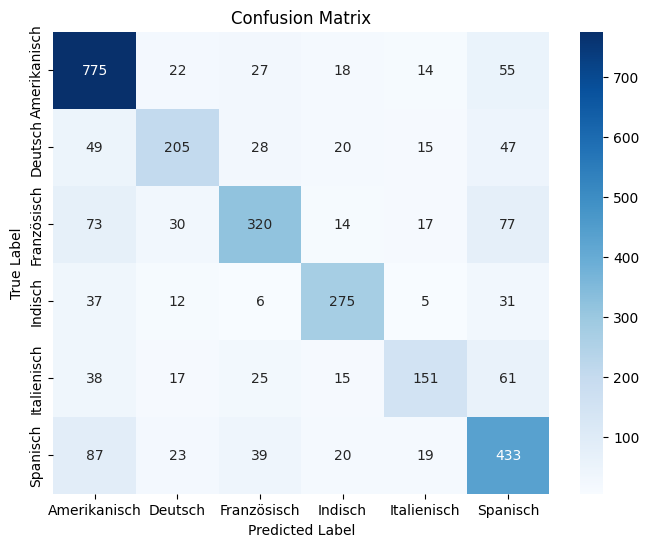

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=grid_search_reduced.classes_, 
            yticklabels=grid_search_reduced.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Generate a classification report
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)

              precision    recall  f1-score   support

Amerikanisch       0.73      0.85      0.79       911
     Deutsch       0.66      0.56      0.61       364
 Französisch       0.72      0.60      0.66       531
     Indisch       0.76      0.75      0.76       366
 Italienisch       0.68      0.49      0.57       307
    Spanisch       0.62      0.70      0.65       621

    accuracy                           0.70      3100
   macro avg       0.70      0.66      0.67      3100
weighted avg       0.70      0.70      0.69      3100

